In [17]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
winedata = load_wine()
X, y = winedata['data'], winedata['target']

In [9]:
print("X shape:", X.shape)
print("y shape:", y.shape)

# 13 features (i.e., the dataset is 13 dimensional) 
# 3 classes. 
# 178 samples

X shape: (178, 13)
y shape: (178,)


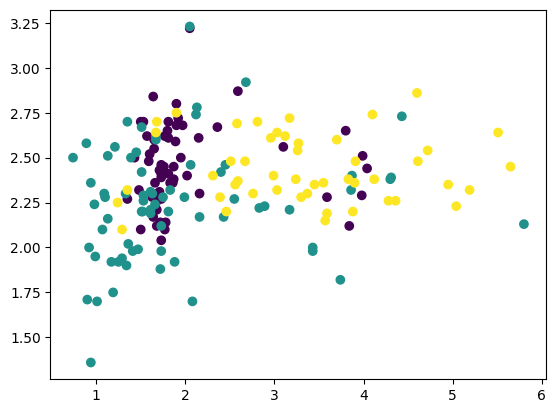

In [4]:
# Among the 13 features, we can pick any two and plot with matplotlib (we color-coded the different classes using the c argument)
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

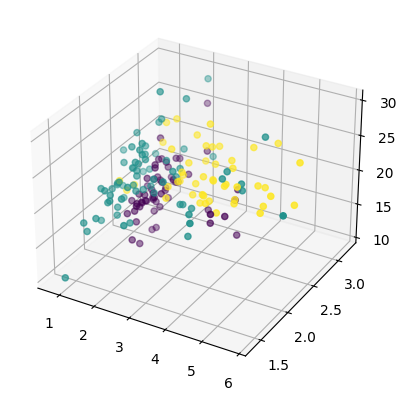

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
plt.show()

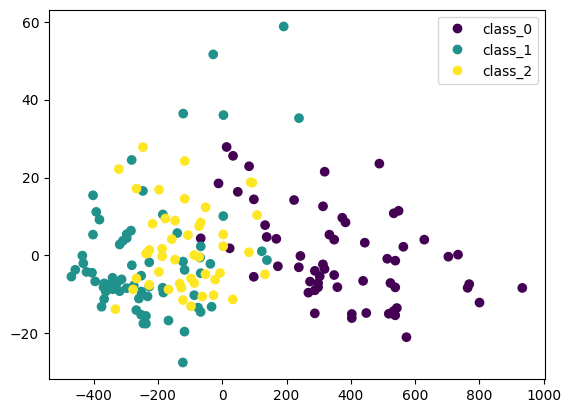

In [8]:
# But this doesn’t reveal much of how the data looks like, because majority of the features are not shown. 
# We now resort to principal component analysis
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

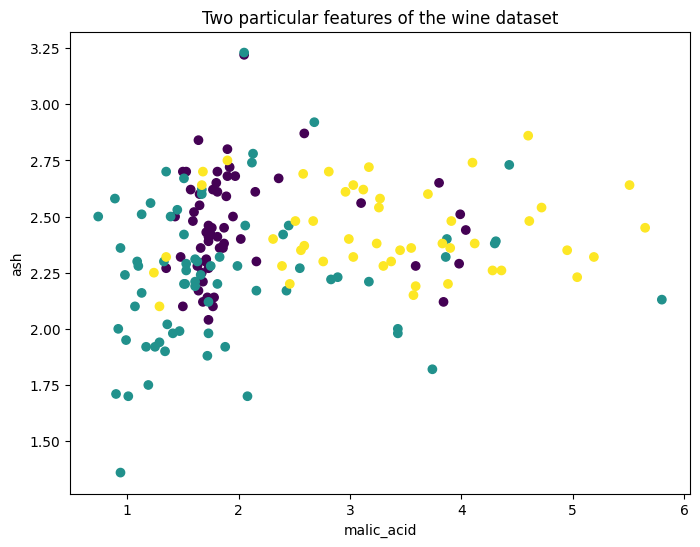

In [10]:
# Here we transform the input data X by PCA into Xt. 
# We consider only the first two columns, which contain the most information, and plot it in two dimensional. 
# We can see that the purple class is quite distinctive, but there is still some overlap. 
# If we scale the data before PCA, the result would be different
# Because PCA is sensitive to the scale, if we normalized each feature by StandardScaler we can see a better result.
# Here the different classes are more distinctive. 
# By looking at this plot, we are confident that a simple model such as SVM can classify this dataset in high accuracy.

# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()

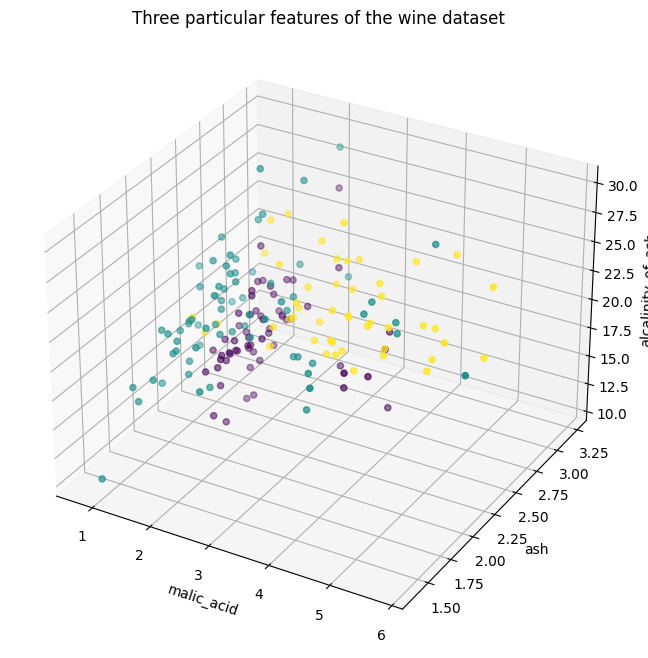

In [15]:
# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()

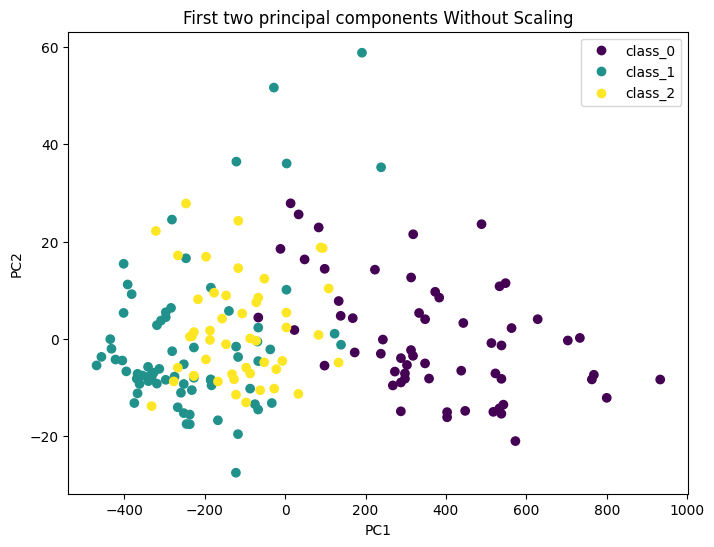

In [20]:
# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components Without Scaling")
plt.show()

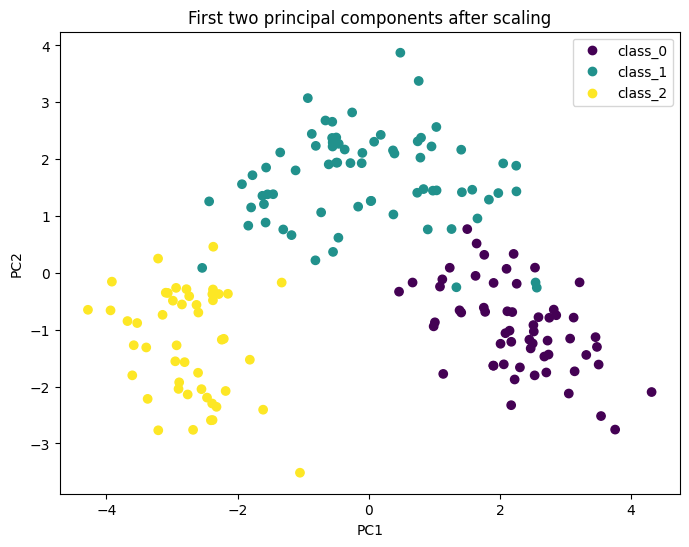

In [19]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [ ]:
# Here is an example code snippet that demonstrates how to use PCA in SVM for classification on the wine dataset in Scikit-learn:

# 1- Import the necessary libraries: NumPy, Pandas, Matplotlib, Scikit-learn, and Seaborn
# 2- Load the wine dataset from Scikit-learn's datasets module
# 3- Split the dataset into training and testing sets
# 4- Standardize the dataset using Scikit-learn's StandardScaler
# 5- Choose the number of principal components to be used based on the explained variance ratio. 
# 6- This can be done using Scikit-learn's PCA class
# 7- Train the SVM classifier on the reduced dataset
# 8- Evaluate the performance of the classifier on the testing set
# 9- Visualize the decision boundary of the classifier using Seaborn

In [22]:
#****************************************************************
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_wine

In [23]:
# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Standardize dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Perform PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# The concept of explained variance is useful in assessing how important each component is. 
# In general, the larger the variance explained by a principal component, the more important that component is

In [35]:
# Train SVM classifier
# kernel − string, optional, default = ‘rbf’
# This parameter specifies the type of kernel to be used in the algorithm. 
# we can choose any one among, ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. The default value of kernel would be ‘rbf’.
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [36]:
# Evaluate classifier
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)

In [38]:
accuracy

0.9722222222222222

c:\Users\Kami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

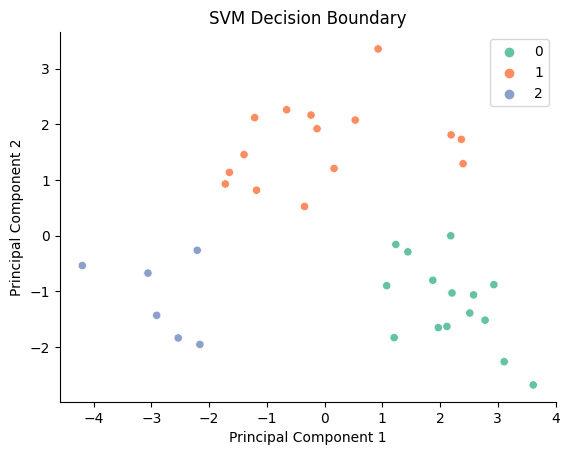

In [37]:
# Visualize decision boundary
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set2')
sns.despine()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.show()